In [29]:
# 이미지 데이터 로딩
from tensorflow.keras.datasets import mnist # module.load_data()
(train_image,train_labels),(test_image,test_labels)=mnist.load_data()

In [30]:
# 학습 데이터 구조 확인
train_image.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [31]:
# 첫번째 이미지
print(train_labels[0]) # 첫번째이미지의 답 : 5
train_image[0] # 5라는 숫자 이미지

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [33]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [34]:
test_image.shape

(10000, 28, 28)

In [35]:
# 학습 데이터 준비(60000,28,28)3차원  : 28X28 2차원인데 => 1차원 변경
train_image=train_image.reshape((60000,28*28))
# 0 ~ 1 사이값으로 변환
train_image=train_image.astype('float32')/255

# 테스트 데이터 동일 처리
test_image=test_image.reshape((10000,28*28))
test_image=test_image.astype('float32')/255

In [36]:
# 학습 진행
model.fit(
      train_image       # 학습데이터
    , train_labels      # 학습데이터 답
    , epochs=5          # 전체데이터에 대한 반복 학습 횟수
    , batch_size=128    # 한번 학습(미분)시 사용할 데이터 포인트 개수
)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2544 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1032 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0495 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9889


In [51]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2583 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1049 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9883


In [41]:
# 검증
# 테스트 이미지 10개 가지고 와서 
test_digits=test_image[:10]
# 모델에 집어넣어서 예측값(10개) , 한개의 예측값에는 10개 출력
predictions=model.predict(test_digits)
print(predictions[0]) # 10 개 결과 출력 
# => argmax
print(predictions[0].argmax()) # 최대값을 가지고 있는 인덱스 반환
print(predictions[0][7])
# 테스트 데이터 첫번째 이미지의 진짜답
print(f'테스트 데이터 첫번째 이미지의 답 : {test_labels[0]}')

# 테스트 이미지 원래답 10개와 비교


1/1 [==============================] - 0s 18ms/step
[4.9572324e-09 9.1989631e-11 5.7380907e-06 1.8711116e-04 1.0282359e-11
 4.8109158e-08 9.5122257e-15 9.9979323e-01 1.4218735e-08 1.3921418e-05]
7
0.99979323
테스트 데이터 첫번째 이미지의 답 : 7


In [42]:
test_loss, test_acc=model.evaluate(test_image, test_labels) # 테스트이미지(10000개), 답
print(f'테스트 이미지에 대한 모델 정확도 : {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9806
테스트 이미지에 대한 모델 정확도 : 0.9805999994277954


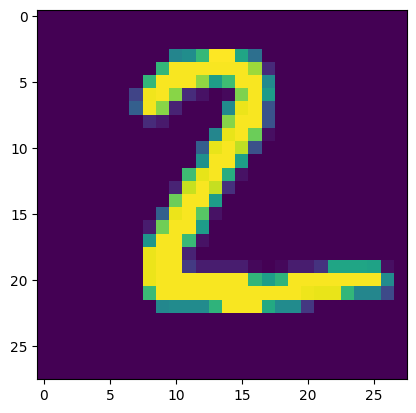

In [45]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[1])
plt.show()

313/313 [==============================] - 0s 896us/step
테스트이미지 예측값 : 5
원래답 : 5


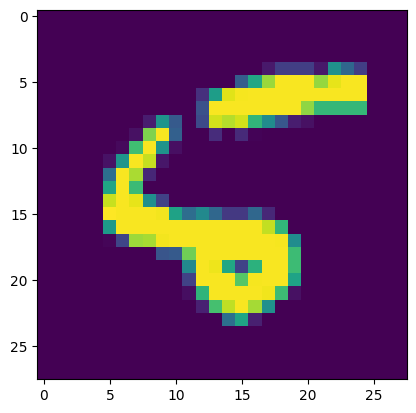

In [50]:
predictions=model.predict(test_image)
idx=8
print(f'테스트이미지 예측값 : {predictions[idx].argmax()}')
print(f'원래답 : {test_labels[idx]}')
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[idx])
plt.show()


In [63]:
# 예측값 == 원래값 => boolean
import pandas as pd
predictions=model.predict(test_images).argmax(axis=1)
predictions

313/313 [==============================] - 0s 842us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

313/313 [==============================] - 0s 948us/step
원래답 : 4
예측값 : 7


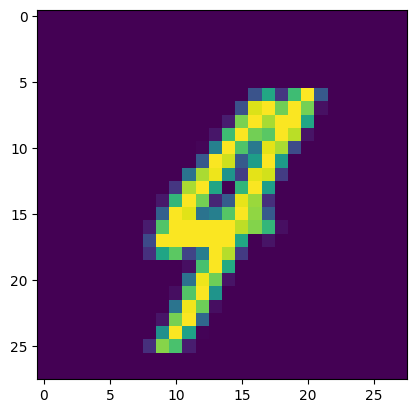

원래답 : 9
예측값 : 4


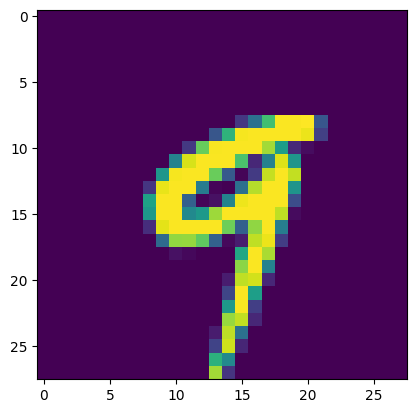

원래답 : 2
예측값 : 8


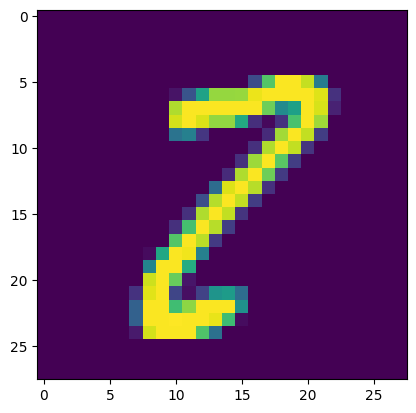

원래답 : 2
예측값 : 7


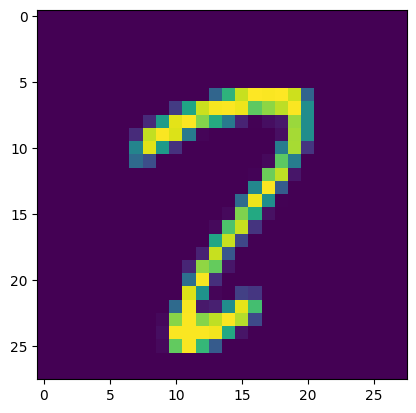

원래답 : 5
예측값 : 8


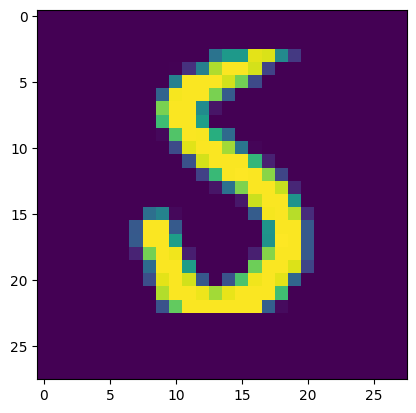

In [75]:

# 예측값 == 원래값 => boolean
import pandas as pd
predictions=model.predict(test_images).argmax(axis=1)
# 결과 저장 데이터프레임 생성
result_df=pd.DataFrame({
    '예측값':predictions 
    ,'원래값':test_labels
})
result_df['bool']=result_df['예측값']==result_df['원래값']
false_labels_indexs=result_df[result_df['bool']==False].index

for idx in false_labels_indexs[-5:]: # 뒤에서 5개 출력
    print(f'원래답 : {test_labels[idx]}')
    print(f'예측값 : {predictions[idx]}')
    plt.imshow(test_images[idx].reshape((28,28)))
    plt.show()


In [67]:
result_df['bool']=result_df['예측값']==result_df['원래값']
result_df.head()

,예측값,원래값,bool
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True


In [69]:
false_labels_indexs=result_df[result_df['bool']==False].index
false_labels_indexs[:10]

Index([247, 259, 274, 321, 340, 445, 495, 582, 613, 619], dtype='int64')

원래답 : 4
예측값 : 2


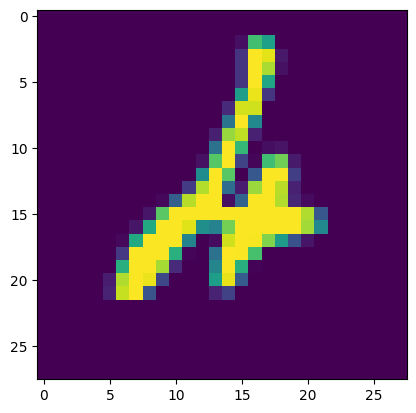

원래답 : 6
예측값 : 0


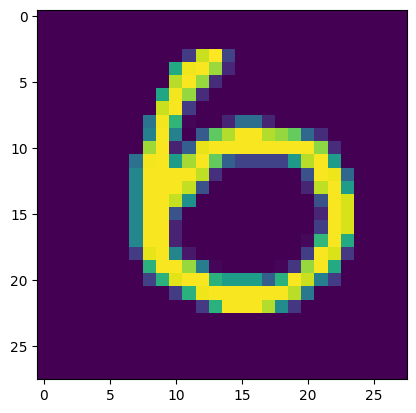

원래답 : 9
예측값 : 3


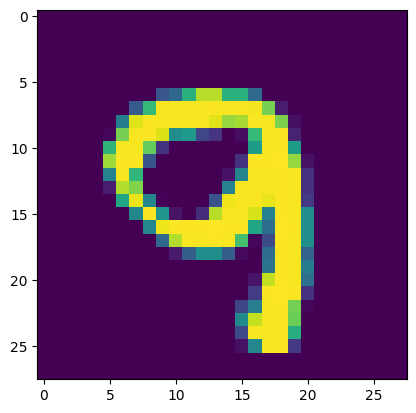

원래답 : 2
예측값 : 7


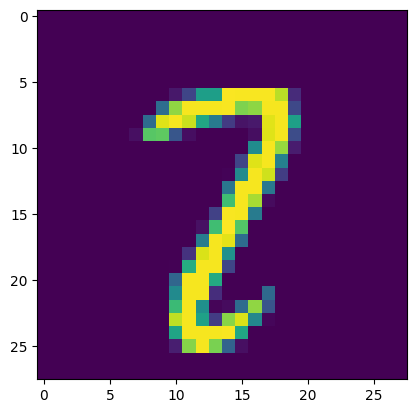

원래답 : 5
예측값 : 3


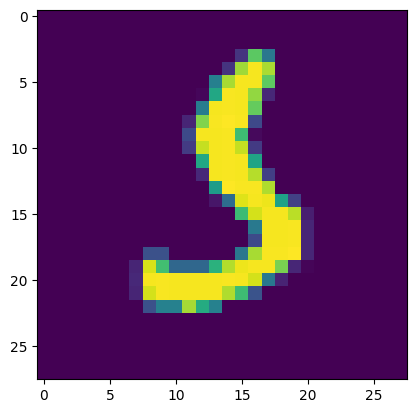

In [73]:
for idx in false_labels_indexs[:5]:
    print(f'원래답 : {test_labels[idx]}')
    print(f'예측값 : {predictions[idx]}')
    plt.imshow(test_images[idx].reshape((28,28)))
    plt.show()

### NEXT

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# 학습 이미지의 차원 확인
train_images.ndim, train_images.shape

(3, (60000, 28, 28))

In [6]:
train_images.dtype

dtype('uint8')

In [7]:
import matplotlib.pyplot as plt
digit = train_images[4]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

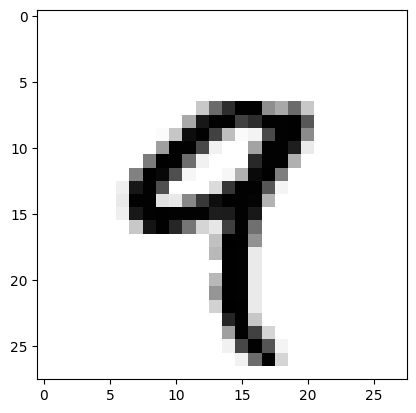

In [8]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
train_labels[4] # 답

9

In [11]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [12]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

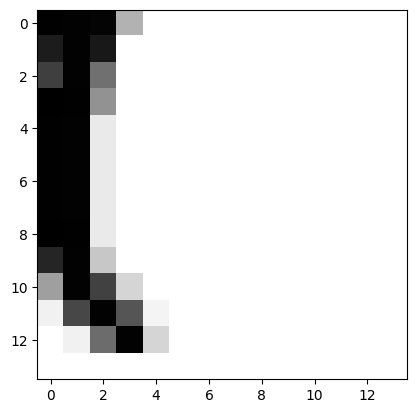

In [14]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

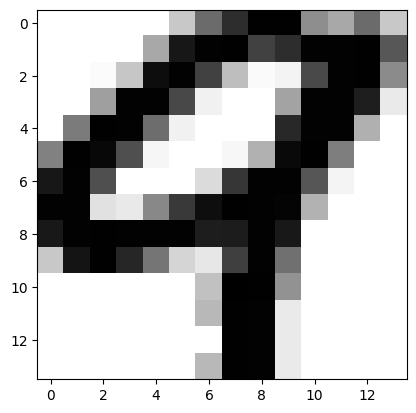

In [16]:
my_slice = train_images[4, 7:-7, 7:-7]
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

In [17]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [18]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [20]:
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time() # 연산 시작 시간 저장
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.) # relu
print("걸린 시간: {0:.6f} s".format(time.time() - t0)) # 걸린 시간 출력

걸린 시간: 0.004992 s


In [22]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.6f} s".format(time.time() - t0))

걸린 시간: 1.564361 s
